# 绘制火山图对基因表达进行差异性分析

## 导入包，导入数据

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 读取CSV文件
file_path = 'GSE42872_IDS.csv'  # 替换为你的CSV文件路径
expression_data = pd.read_csv(file_path, index_col=0)  # 假设基因名称在第一列，样本名称为索引

In [11]:
# 提取对照组和处理组的数据
control_group = expression_data.iloc[:, 0:3]  # 提取前三列为对照组
treatment_group = expression_data.iloc[:, 3:]  # 提取后三列为处理组
control_group
treatment_group

,GSM1052618,GSM1052619,GSM1052620
OR4F17,4.430080,4.249810,4.295490
LOC100134822,9.226746,9.731880,9.591601
OR4F29,7.372262,8.028432,7.336650
LOC100287934,9.500005,9.848530,9.468525
FAM87B,6.890860,7.010880,7.049520
...,...,...,...
NME2,12.668050,12.630025,12.539900
CYP2D6,7.612140,7.671900,7.744220
POLR2M,10.183950,10.133850,10.094650
UBE2V1,13.014600,13.066100,13.107200


In [12]:
# 计算p-value和fold change
p_values = []
fold_changes = []

In [13]:
for gene in expression_data.index:  # 遍历每个基因
    control_values = control_group.loc[gene].values
    treatment_values = treatment_group.loc[gene].values

    # 计算t检验的p-value
    t_stat, p_value = stats.ttest_ind(control_values, treatment_values)
    p_values.append(p_value)

    # 计算fold change
    fold_change = treatment_values.mean() / control_values.mean()
    fold_changes.append(fold_change)

In [14]:
control_values

array([6.93675, 7.06614, 7.01405])

In [15]:
# 将结果与基因名称对应
results = pd.DataFrame({'Gene': expression_data.index, 'p-value': p_values, 'Fold Change': fold_changes})

In [16]:
print(results)

               Gene   p-value  Fold Change
0            OR4F17  0.404834     1.014290
1      LOC100134822  0.013052     1.073332
2            OR4F29  0.018214     1.132090
3      LOC100287934  0.021027     1.067541
4            FAM87B  0.883421     0.998545
...             ...       ...          ...
19998          NME2  0.140041     0.992815
19999        CYP2D6  0.497088     0.994395
20000        POLR2M  0.107053     1.014134
20001        UBE2V1  0.290322     1.002538
20002         OR3A2  0.003363     1.046601

[20003 rows x 3 columns]


In [17]:
results = pd.DataFrame({'Gene': expression_data.index, 'p-value': p_values, 'Fold Change': fold_changes})

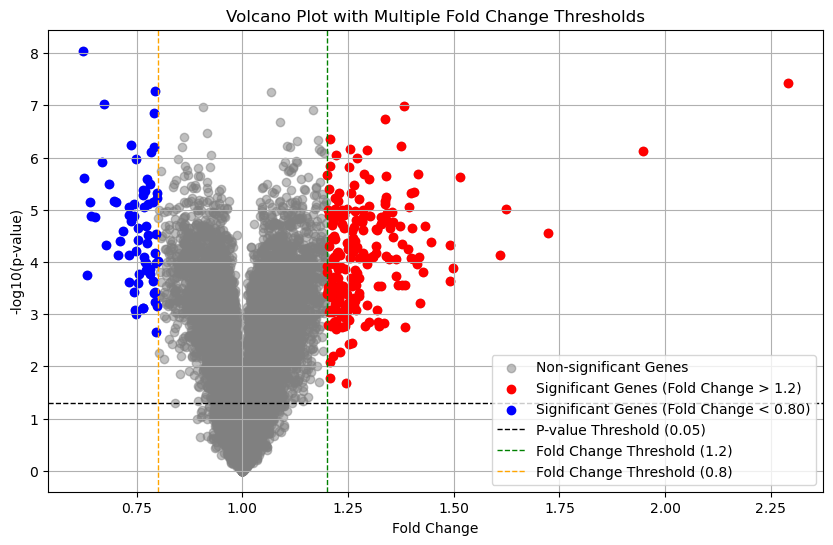

In [18]:
# 设置阈值，用于标记显著性基因
p_value_threshold = 0.05
fold_change_threshold1 = 1.2
fold_change_threshold2 = 0.8

# 标记显著性基因
significant_genes1 = results[(results['p-value'] < p_value_threshold) & (results['Fold Change'].abs() > fold_change_threshold1)]
significant_genes2 = results[(results['p-value'] < p_value_threshold) & (results['Fold Change'].abs() < fold_change_threshold2)]

# 绘制火山图
plt.figure(figsize=(10, 6))
plt.scatter(results['Fold Change'], -np.log10(results['p-value']), color='grey', alpha=0.5, label='Non-significant Genes')
plt.scatter(significant_genes1['Fold Change'], -np.log10(significant_genes1['p-value']), color='red', label='Significant Genes (Fold Change > 1.2)')
plt.scatter(significant_genes2['Fold Change'], -np.log10(significant_genes2['p-value']), color='blue', label='Significant Genes (Fold Change < 0.80)')
plt.axhline(-np.log10(p_value_threshold), color='black', linestyle='--', linewidth=1, label=f'P-value Threshold ({p_value_threshold})')

# 绘制两个fold change阈值对应的直线
plt.axvline(fold_change_threshold1, color='green', linestyle='--', linewidth=1, label=f'Fold Change Threshold ({fold_change_threshold1})')
plt.axvline(fold_change_threshold2, color='orange', linestyle='--', linewidth=1, label=f'Fold Change Threshold ({fold_change_threshold2})')

plt.xlabel('Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot with Multiple Fold Change Thresholds')
plt.legend()
plt.grid(True)
plt.show()
